# Non parametric statistics - Regression

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from math import *
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
# Deux fonctions (au moins) permettent de faire de l'estimation à noyau sous Python
# La première KDEUnivarite
from statsmodels.nonparametric.kde import KDEUnivariate 
from statsmodels.nonparametric.kernel_regression import KernelReg
# La seconde KernelDensity
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
#from sklearn_extensions.kernel_regression import KernelRegression


# Dans la suite on regarde ces deux fonctions.

In [3]:
n = 1000
sg = sqrt(1)
#X = np.random.uniform(0, 2*np.pi, n)
X = 2*np.pi*np.random.beta(1, 3, n)
eps = np.random.normal(0,sg, n)
def r(x): return(3/(x+1)+5+4*np.cos(x))
def dr(x): return(-3/(x+1)**2-4*np.sin(x))
# def r(x): return(np.cos(x))
# def dr(x): return(-np.sin(x))
Y = r(X)+eps

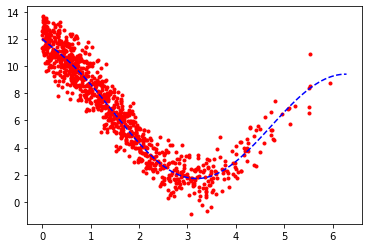

In [4]:
grid = np.linspace(0, 2*np.pi, 100)

plt.plot(X, Y, 'r.')
plt.plot(grid, r(grid), 'b--')


Faire varier, sg, n, et la loi de $X$, à quoi s'attend-on?

In [5]:
kr0 =KernelReg(Y, X, var_type = 'c' , reg_type = 'll', bw = 0.3*np.ones((1,)))
kr1 =KernelReg(Y, X, var_type = 'c' , reg_type = 'lc', bw = 0.3*np.ones((1,)))

In [9]:
#help(KernelReg)

Une première fonction qui code "Nadaraya-Watson" (reg_type = 'lc') et le polynome local d'ordre 1 (regtype = 'll'). 

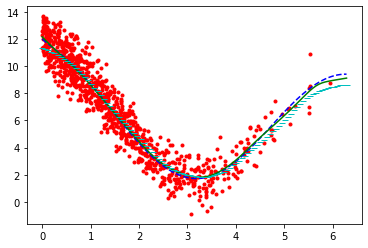

In [7]:
grid = np.linspace(0, 2*np.pi, 100)
r_est0, dr_est0 = kr0.fit(grid)
r_est1, dr_est1 = kr1.fit(grid)
#r_est.__class__
plt.plot(X, Y, 'r.')
plt.plot(grid, r(grid), 'b--')
plt.plot(grid, r_est0, 'g-')
plt.plot(grid, r_est1, 'c_')

Quid de la dérivée?

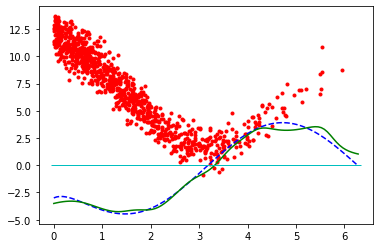

In [8]:
plt.plot(X, Y, 'r.')
plt.plot(grid, dr(grid), 'b--')
plt.plot(grid, dr_est0, 'g-')
plt.plot(grid, dr_est1, 'c_')